In [ ]:
import random
import math

def get_polar_angle(point):
    x, y = point
    return math.atan2(-y, x) % (2 * math.pi)separate

def sort_points_clockwise(points):
    # Find the starting point in the 3rd quadrant
    start_point = points[0]
    # Rearrange the points list starting from the 3rd quadrant point
    start_index = points.index(start_point)
    ordered_points = points[start_index:] + points[:start_index]

    center_x = sum(point[0] for point in ordered_points) / len(ordered_points)
    center_y = sum(point[1] for point in ordered_points) / len(ordered_points)
    center_point = (center_x, center_y)

    sorted_points = sorted(ordered_points, key=lambda point: get_polar_angle((point[0] - center_point[0], point[1] - center_point[1])))

    return sorted_points

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/fm_pd_and_swedd_v3.csv')

df = df[['Patient_No', 'Point1_x', 'Point1_y', 'Point2_x',
       'Point2_y', 'Point3_x', 'Point3_y', 'Point4_x', 'Point4_y',
       'Point5_x', 'Point5_y', 'Point6_x', 'Point6_y', 'Point7_x',
       'Point7_y', 'Point8_x', 'Point8_y', 'Point9_x', 'Point9_y',
       'Point10_x', 'Point10_y', 'Point11_x', 'Point11_y', 'Point12_x',
       'Point12_y', 'Class']]

In [ ]:
df

,Patient_No,Point1_x,Point1_y,Point2_x,Point2_y,Point3_x,Point3_y,Point4_x,Point4_y,Point5_x,...,Point8_y,Point9_x,Point9_y,Point10_x,Point10_y,Point11_x,Point11_y,Point12_x,Point12_y,Class
0,SWEDD_Patient121,-18.846942,17.322393,40.036573,12.534023,13.241722,-6.483834,-7.623609,-19.546434,-8.960635,...,18.552184,25.385702,-4.575019,14.453098,-16.617125,-23.596882,-34.020862,-26.086378,12.270134,0
1,141692,3.323099,-29.836247,17.056157,-30.077135,9.889508,-13.472124,36.178684,28.100023,-34.623329,...,18.886097,15.823267,-35.377528,-23.006016,-22.248843,-27.329221,8.497148,-13.797728,12.287808,1
2,57090,-16.299255,-2.227272,-2.016096,-16.267195,-0.003215,-28.091936,26.623483,-3.322772,3.564840,...,-28.718702,-9.381923,-5.167862,-11.545075,-2.412415,-12.881645,25.469120,1.980824,23.035429,1
3,3352,-12.289682,34.855292,-2.419070,-29.174834,-0.668213,-30.294492,6.557395,-27.468668,17.515544,...,-13.113868,-7.132842,-5.416022,-9.171960,-15.884244,-32.517147,-3.858031,20.368528,27.183847,1
4,3387,-2.060636,6.697909,-30.430703,-8.601717,-7.426248,-27.075016,0.709045,-17.322346,20.372479,...,-36.685990,-2.251300,-33.425012,-31.525552,-19.982857,-31.088636,17.385280,2.795507,73.990381,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,3113,-21.725866,29.486826,-21.086912,-24.637188,2.381190,-27.803964,18.851029,-8.961411,34.525824,...,-17.258192,-2.580476,-24.320651,-11.136717,-25.158108,-19.240567,40.698575,-12.403748,37.210615,1
1082,3223,-2.735788,-15.039109,-19.937295,-0.973414,0.835424,-16.109581,-0.131687,-10.895474,4.767971,...,-17.877246,-19.241301,-12.404384,-25.716735,-20.272259,-16.869824,36.929375,10.337816,29.574438,1
1083,153120,-37.086120,-13.268059,-27.332257,-39.953894,-4.336349,-45.489384,18.069980,8.121267,52.934671,...,-6.788675,-30.718502,-39.035060,-36.293490,-17.373006,-9.309466,15.382272,23.111458,47.447930,1
1084,176920,-33.878816,16.460175,-40.642474,-23.382900,-19.554293,-11.751942,34.690047,-10.804559,44.316563,...,-20.979869,-24.666612,-39.844959,-27.416201,-28.740265,-23.659200,26.567392,16.611032,40.119375,1


In [ ]:
# CHECKING 0 MEAN OR NOT

l = df.iloc[0].values

sumx = 0
sumy = 0

for i in range(1, 13):
  if(i%2==0):
    sumx+=l[i]
  else:
    sumy+=l[i]

sumy

-3.552713678800501e-15

In [ ]:
for it in range(len(df)):
    l = df.iloc[it].values

    # Creating a new list to store the modified row
    new_l = [l[0]]

    part1 = l[1:13]
    left = []

    # Iterating over the range from 0 to 6 (exclusive) and Each iteration processes two consecutive elements
    i = 0
    for idx in range(6):
        # Appending pairs of points to 'left'
        left.append((part1[i], part1[i+1]))
        i += 2

    left_y_anti = sort_points_clockwise(left)

    low = 1000
    for i in left_y_anti:
        low = min(low, i[0])

    # Reordering 'left_y_anti' so that the point with the minimum y-coordinate is first
    while(left_y_anti[0][0] != low):
        left_y_anti = left_y_anti[-1:] + left_y_anti[:-1]

    # Creating a new list to store the sorted values of 'part1'
    part1_sorted = []
    for i in left_y_anti:
        part1_sorted.append(i[0])
        part1_sorted.append(i[1])

    # Extracting the second part of the row from index 13 to 24
    part2 = l[13:25]
    right = []

    i = 0
    for idx in range(6):
        right.append((part2[i], part2[i+1]))
        i += 2

    right_y_anti = sort_points_clockwise(right)

    low = 1000
    for i in right_y_anti:
        low = min(low, i[0])

    while(right_y_anti[0][0] != low):
        right_y_anti = right_y_anti[-1:] + right_y_anti[:-1]

    # Creating a new list to store the sorted values of 'part2'
    part2_sorted = []
    for i in right_y_anti:
        part2_sorted.append(i[0])
        part2_sorted.append(i[1])

    # Extracting the third part of the row at index 25
    part3 = [l[25]]

    new_l = new_l + part1_sorted + part2_sorted + part3

    # Updating the current row in the DataFrame with the modified row
    df.loc[it] = new_l


# Visualize it

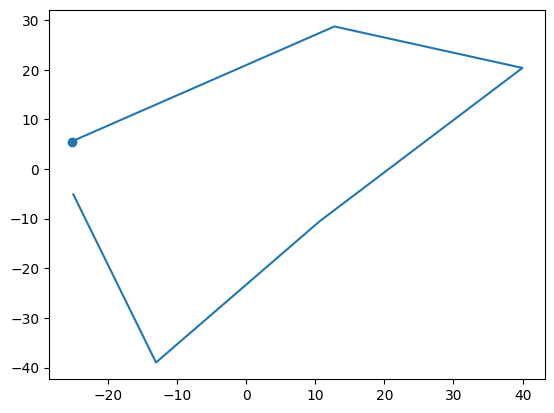

In [ ]:
import matplotlib.pyplot as plt

# Choose what points to visualize
idx = 0
# The values of the row 'idx' from columns 1 to 12 are extracted
points = df.iloc[idx].tolist()[1:13]

# 'left' will store pairs of points
left = []

# Iterating over the range from 0 to 6 (exclusive) & Each iteration processes two consecutive points
i = 0
for idx in range(6):
    # Extracting two consecutive points and appending them to 'left' as a tuple
    left.append((points[i], points[i+1]))
    i += 2

plt.figure()

# Extracting x-coordinates (xs) and y-coordinates (ys) from 'left'
xs, ys = zip(*left)

# Plotting a line connecting the points in 'left'
plt.plot(xs, ys)

# Adding a scatter plot marker for the first point in 'left'
plt.scatter(xs[0], ys[0])

plt.show()